In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

# Data rotation example

(30, 2)
          x         y
0 -0.116122 -0.437222
1  0.329851  0.423104
2  0.282891  0.020840
3  0.138039  0.327941
4 -0.427677 -0.250597
Variance by variable:
 x    0.802357
y    0.892366
dtype: float64


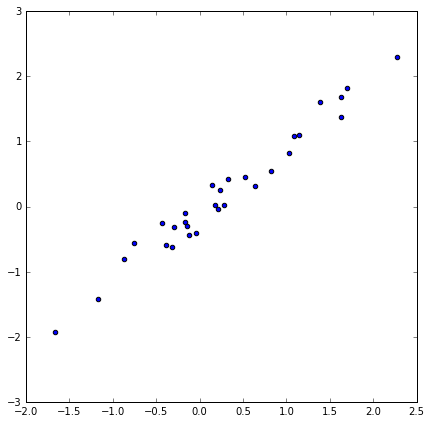

In [18]:
## Read and display data
data = pd.read_table("pca.csv")
print(data.shape)
print(data.head())
plt.figure(figsize=(7,7))
plt.scatter(data.x, data.y)
print("Variance by variable:\n", data.apply(np.var, axis=0))

One can see that x and y have roughly equal variance

In [10]:
## perform PCA
## We just get component sizes, values, etc.
m = PCA().fit(data)
print("components:", m.components_)
print("explained_variance:", m.explained_variance_)
print("explained_variance_ratio:", m.explained_variance_ratio_)
print("singular_values:", m.singular_values_)

components: [[-0.68773533 -0.72596152]
 [-0.72596152  0.68773533]]
explained_variance: [1.73809703 0.01506523]
explained_variance_ratio: [0.99140683 0.00859317]
singular_values: [7.09963477 0.66097771]


Rotate data: we use the same PCA analysis as above, just now we
compute the rotated data instead of the components.

[[ 0.3972673  -0.21639249]
 [-0.5340076   0.05152416]
 [-0.20968314 -0.19103583]
 [-0.333007    0.12532525]
 [ 0.47605254  0.13813214]]
variance by variable:
 0    1.680160
1    0.014563
dtype: float64
mean by variable:
 0   -0.348771
1   -0.070329
dtype: float64


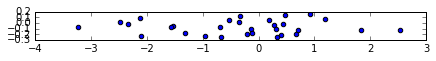

In [31]:
dR = data @ m.components_
print(dR[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dR[:,0], dR[:,1])
plt.axes().set_aspect("equal")
print("variance by variable:\n", pd.DataFrame(dR).apply(np.var, axis=0))
print("mean by variable:\n", pd.DataFrame(dR).apply(np.mean, axis=0))

[[ 0.74603821 -0.14606377]
 [-0.1852367   0.12185289]
 [ 0.13908777 -0.1207071 ]
 [ 0.01576391  0.19565397]
 [ 0.82482345  0.20846087]]
Variance by variable:
 [1.68016046 0.01456305]
Mean by variable:
 [3.33066907e-17 9.25185854e-18]


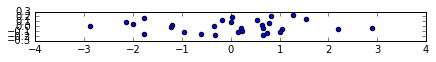

In [33]:
dataRot = PCA().fit_transform(data)
print(dataRot[:5,:])
plt.figure(figsize=(7,7))
plt.scatter(dataRot[:,0], dataRot[:,1])
plt.axes().set_aspect("equal")
print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))
print("Mean by variable:\n", np.apply_along_axis(np.mean, 0, dataRot))

One can see that the first component has much larger variance than the
second one.

# Example of regression with dimensionality reduction

In [34]:
## create x1, x2 that are closely correlated
n = 30
x1 = np.random.normal(size=(n,))
x2 = x1 + np.random.normal(scale = 0.3, size=(n,))
y = x1 + x2 + np.random.normal(scale = 0.5, size=(n,))
data2 = pd.DataFrame( np.column_stack((x1, x2, y)),
                      columns=['x1', 'x2', 'y'])
print("correlation:", data2.x1.corr(data2.x2))
print("data example:\n", data2.head())

correlation: 0.9636174066692469
data example:
          x1        x2         y
0  0.580823  0.714801  1.431859
1 -2.726423 -2.386811 -5.623782
2 -0.163836 -0.517796 -0.656510
3 -0.165156 -0.578319 -1.291843
4 -0.189388  0.240241  0.148798


In [35]:
# rotate data
mat2 = data2.drop('y', axis=1).as_matrix()
dataRot2 = PCA().fit_transform(mat2)
print(dataRot2[:5,:])

[[-1.22525366 -0.01675574]
 [ 3.29819396 -0.32708069]
 [ 0.18451372  0.27712877]
 [ 0.22973918  0.31737223]
 [-0.35326411 -0.25772433]]
